<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/BELVIN_BARASA_WANAMI_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Importing pandas for data manipulation
import numpy as np # Importing numpy for numerical operations
import pymc as pm
import os
import statsmodels.api as sm
import plotly.express as px # Importing Plotly Epress for interactive visualizations
import plotly.graph_objects as go # Importing Plotly Graph Object for advanced visualizations
import bokeh.plotting as bp # Importing Bokeh for web-based interactive visualizations
import altair as alt # Importing Altair for declarative data visualization
import seaborn as sns # Importing seaborn for statistical data visualization
import matplotlib.pyplot as plt # Importing SciPy for statistical analysis
from scipy import stats # Import Scipy for statistical analysis
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA model for time series forecasting
import geopandas as gpd # Importing Geopandas for handling spatical data
import folium # Importing Folium for interactive map visualizatio
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import arviz as az
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Load Dataset (CSV file will be created seperately)
df = pd.read_csv('/content/mental_health_indicators_ken.csv') # Reading dataset into a pandas DataFrame
print("Orignal Data :")
print(df.head()) # Display the first 5 rows of the dataset

Orignal Data :
        GHO (CODE)                                      GHO (DISPLAY)  \
0  #indicator+code                                    #indicator+name   
1       SDGSUICIDE       Crude suicide rates (per 100 000 population)   
2            MH_12  Age-standardized suicide rates (per 100 000 po...   
3       SDGSUICIDE       Crude suicide rates (per 100 000 population)   
4       SDGSUICIDE       Crude suicide rates (per 100 000 population)   

                                           GHO (URL) YEAR (DISPLAY)  \
0                                     #indicator+url     #date+year   
1  https://www.who.int/data/gho/data/indicators/i...           2008   
2  https://www.who.int/data/gho/data/indicators/i...           2009   
3  https://www.who.int/data/gho/data/indicators/i...           2019   
4  https://www.who.int/data/gho/data/indicators/i...           2016   

          STARTYEAR         ENDYEAR REGION (CODE) REGION (DISPLAY)  \
0  #date+year+start  #date+year+end  #region+code

In [ ]:
print(df.head())# enable view the first five rows of the data set

        GHO (CODE)                                      GHO (DISPLAY)  \
0  #indicator+code                                    #indicator+name   
1       SDGSUICIDE       Crude suicide rates (per 100 000 population)   
2            MH_12  Age-standardized suicide rates (per 100 000 po...   
3       SDGSUICIDE       Crude suicide rates (per 100 000 population)   
4       SDGSUICIDE       Crude suicide rates (per 100 000 population)   

                                           GHO (URL) YEAR (DISPLAY)  \
0                                     #indicator+url     #date+year   
1  https://www.who.int/data/gho/data/indicators/i...           2008   
2  https://www.who.int/data/gho/data/indicators/i...           2009   
3  https://www.who.int/data/gho/data/indicators/i...           2019   
4  https://www.who.int/data/gho/data/indicators/i...           2016   

          STARTYEAR         ENDYEAR REGION (CODE) REGION (DISPLAY)  \
0  #date+year+start  #date+year+end  #region+code     #region+na

In [ ]:
print(df.tail())# ebable view the last five rows of the data set

     GHO (CODE)                                      GHO (DISPLAY)  \
166       MH_12  Age-standardized suicide rates (per 100 000 po...   
167  SDGSUICIDE       Crude suicide rates (per 100 000 population)   
168  SDGSUICIDE       Crude suicide rates (per 100 000 population)   
169  SDGSUICIDE       Crude suicide rates (per 100 000 population)   
170       MH_12  Age-standardized suicide rates (per 100 000 po...   

                                             GHO (URL) YEAR (DISPLAY)  \
166  https://www.who.int/data/gho/data/indicators/i...           2021   
167  https://www.who.int/data/gho/data/indicators/i...           2018   
168  https://www.who.int/data/gho/data/indicators/i...           2014   
169  https://www.who.int/data/gho/data/indicators/i...           2019   
170  https://www.who.int/data/gho/data/indicators/i...           2014   

    STARTYEAR ENDYEAR REGION (CODE) REGION (DISPLAY) COUNTRY (CODE)  \
166      2021    2021           AFR           Africa            KEN  

In [ ]:
# Step 3: Handling Duplicates
print("\nchecking for duplicates:")
print(df.duplicated().sum()) # count duplicate rows
df = df.drop_duplicates() # Remove duplicate rows


checking for duplicates:
0


In [ ]:
# step 4: Encoding Categorical Variables
print("\nEncoding categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns #selecting categorical columns
label_encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col]) # Apply Label Encoding
  label_encoders[col] = le

print(df.head()) # Display transformed dataset


Encoding categorical variables:
   GHO (CODE)  GHO (DISPLAY)  GHO (URL)  YEAR (DISPLAY)  STARTYEAR  ENDYEAR  \
0           0              0          0               0          0        0   
1           5              2          5               9          9        9   
2           2              1          1              10         10       10   
3           5              2          5              20         20       20   
4           5              2          5              17         17       17   

   REGION (CODE)  REGION (DISPLAY)  COUNTRY (CODE)  COUNTRY (DISPLAY)  \
0              0                 0               0                  0   
1              1                 1               1                  1   
2              1                 1               1                  1   
3              1                 1               1                  1   
4              1                 1               1                  1   

   DIMENSION (TYPE)  DIMENSION (CODE)  DIMENSION (NAM

In [ ]:
# Step 5: Feature Scaling
print("\nApplying featurevscaling:")
numeric_cols = df.select_dtypes(include=[np.number]).columns # selectingvnumeric columns
scaler = StandardScaler() # Initializing standard scaler
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) # standardizing numerical features
print(df.head()) # Display scaled dataset


Applying featurevscaling:
   GHO (CODE)  GHO (DISPLAY)  GHO (URL)  YEAR (DISPLAY)  STARTYEAR   ENDYEAR  \
0   -2.519566      -2.467741  -1.727978       -1.999499  -1.999499 -1.999499   
1    0.835931       0.493548   0.836989       -0.634269  -0.634269 -0.634269   
2   -1.177367      -0.987096  -1.214984       -0.482576  -0.482576 -0.482576   
3    0.835931       0.493548   0.836989        1.034346   1.034346  1.034346   
4    0.835931       0.493548   0.836989        0.579269   0.579269  0.579269   

   REGION (CODE)  REGION (DISPLAY)  COUNTRY (CODE)  COUNTRY (DISPLAY)  \
0     -13.038405        -13.038405      -13.038405         -13.038405   
1       0.076696          0.076696        0.076696           0.076696   
2       0.076696          0.076696        0.076696           0.076696   
3       0.076696          0.076696        0.076696           0.076696   
4       0.076696          0.076696        0.076696           0.076696   

   DIMENSION (TYPE)  DIMENSION (CODE)  DIMENSION (NAM

In [ ]:
# Step 6: Splitting Datasey into Training and Testing Sets
print("\nSplitting dataset into training and testing sets:")
X = df.drop(columns=['Low']) # Assumming 'Low' is the target variable
y = df['Low']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

print("\nData Preprocessing Completed!")


Splitting dataset into training and testing sets:
Training set size: (136, 16), Testing set size: (35, 16)

Data Preprocessing Completed!


In [ ]:
[] # 1.3.2 Handling Missing DATA
print(df.isnull().sum())

GHO (CODE)           0
GHO (DISPLAY)        0
GHO (URL)            0
YEAR (DISPLAY)       0
STARTYEAR            0
ENDYEAR              0
REGION (CODE)        0
REGION (DISPLAY)     0
COUNTRY (CODE)       0
COUNTRY (DISPLAY)    0
DIMENSION (TYPE)     0
DIMENSION (CODE)     0
DIMENSION (NAME)     0
Numeric              0
Value                0
Low                  0
High                 0
dtype: int64


In [ ]:
# 1.3.3 Calculatng summary Statistics
print(df.describe()) # Generating summary statistics

         GHO (CODE)  GHO (DISPLAY)     GHO (URL)  YEAR (DISPLAY)  \
count  1.710000e+02   1.710000e+02  1.710000e+02    1.710000e+02   
mean  -9.998500e-17  -1.350447e-16  1.090745e-16    5.194026e-18   
std    1.002937e+00   1.002937e+00  1.002937e+00    1.002937e+00   
min   -2.519566e+00  -2.467741e+00 -1.727978e+00   -1.999499e+00   
25%   -1.177367e+00  -9.870962e-01 -1.214984e+00   -8.618070e-01   
50%    8.359307e-01   4.935481e-01  8.369891e-01    1.241925e-01   
75%    8.359307e-01   4.935481e-01  8.369891e-01    1.034346e+00   
max    8.359307e-01   4.935481e+00  8.369891e-01    1.337730e+00   

          STARTYEAR       ENDYEAR  REGION (CODE)  REGION (DISPLAY)  \
count  1.710000e+02  1.710000e+02   1.710000e+02      1.710000e+02   
mean   5.194026e-18  5.194026e-18   7.583278e-16      7.583278e-16   
std    1.002937e+00  1.002937e+00   1.002937e+00      1.002937e+00   
min   -1.999499e+00 -1.999499e+00  -1.303840e+01     -1.303840e+01   
25%   -8.618070e-01 -8.618070e-01   7

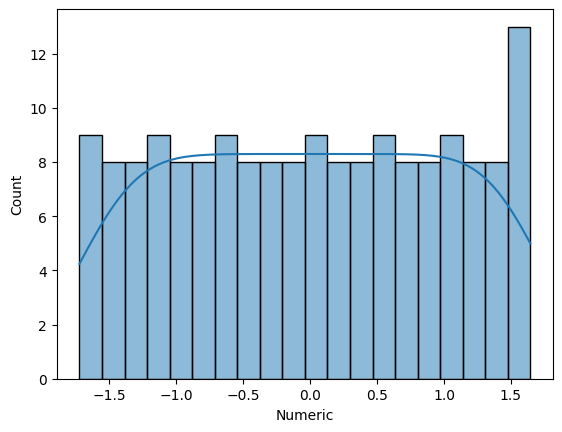

In [ ]:
# 1.3.4 Data Visulization Basics
sns.histplot(df['Numeric'], bins=20, kde=True) # Creating a histogram witj kernel density estimate
plt.show() #  Displaying the plot

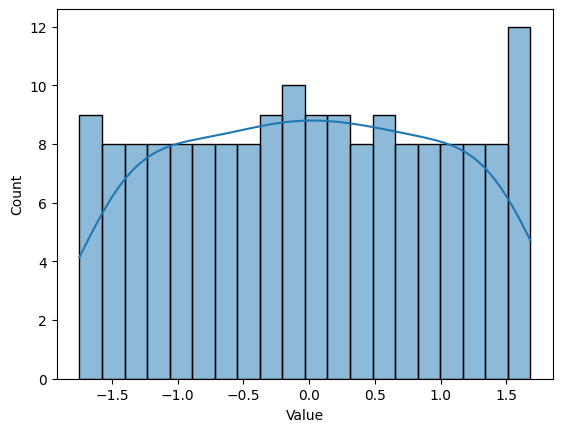

In [ ]:
# 1.3.4 Data Visulization Basics
sns.histplot(df['Value'], bins=20, kde=True) # Creating a histogram witj kernel density estimate
plt.show() #  Displaying the plot

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GHO (CODE)         171 non-null    float64
 1   GHO (DISPLAY)      171 non-null    float64
 2   GHO (URL)          171 non-null    float64
 3   YEAR (DISPLAY)     171 non-null    float64
 4   STARTYEAR          171 non-null    float64
 5   ENDYEAR            171 non-null    float64
 6   REGION (CODE)      171 non-null    float64
 7   REGION (DISPLAY)   171 non-null    float64
 8   COUNTRY (CODE)     171 non-null    float64
 9   COUNTRY (DISPLAY)  171 non-null    float64
 10  DIMENSION (TYPE)   171 non-null    float64
 11  DIMENSION (CODE)   171 non-null    float64
 12  DIMENSION (NAME)   171 non-null    float64
 13  Numeric            171 non-null    float64
 14  Value              171 non-null    float64
 15  Low                171 non-null    float64
 16  High          

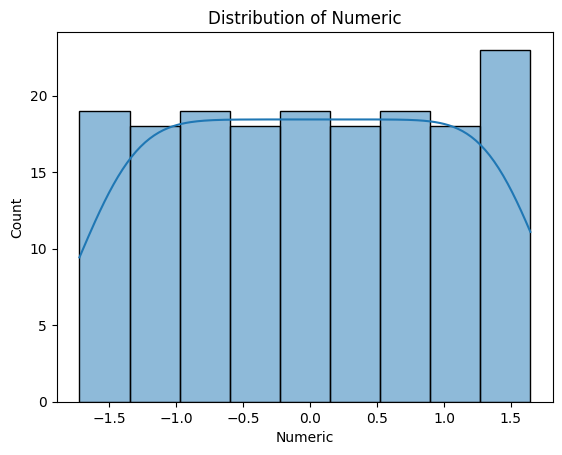

In [ ]:
# Step 2: perform EDA
print("Data types:")
print(df.info())
print("Dataset Overview::")
print(df.head())
print("Data Overview at The Bottom of the Dataset:")
print(df.tail())
print("\nSummary Statistics:")
print(df.describe())

sns.histplot(df['Numeric'], kde=True)
plt.title("Distribution of Numeric")
plt.show()

In [ ]:
# Step 3: Hypothesis Testing

# 1. T-Test: Comparing means of two groups (Feature1 in Low vs High)
Low = df[df['Low'] == 'Low']['Numeric']
High = df[df['High'] == 'High']['Numeric']
t_stat, p_val = stats.ttest_ind(Low, High)
print(f"T-Test Result: t-stat={t_stat:.3f}, p-value={p_val:.3f}")

T-Test Result: t-stat=nan, p-value=nan


<ipython-input-149-82833526eb3b>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(Low, High)


In [ ]:
# 2. ANOVA: Comparing means across multiple groups
group_C = df[df['Value'] == 'Value']['Numeric']
anova_stat, anova_p = stats.f_oneway( High, Low)
print(f"ANOVA Result: F-stat=(anova_stat: .3f), p-value={anova_p:.3f}")

ANOVA Result: F-stat=(anova_stat: .3f), p-value=nan


<ipython-input-150-0e3c90506e7e>:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_stat, anova_p = stats.f_oneway( High, Low)


In [ ]:
#. Chi-Square Test: Relationship between two categorical variables
contingency_table = pd.crosstab(df['High'], df['Low'])
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2-stat={chi2_stat:.3f}, p-value={chi2_p:.3f}")

Chi-Square Test: chi2-stat=22743.000, p-value=0.000


In [ ]:
# 4. Kolmogrov-Smirnov Test: Check if Feature follows a normal distribution
ks_stat, ks_p = stats.kstest(df['Numeric'], 'norm', args=(df['Numeric'].mean(), df['Numeric'].std()))
print(f"Kolmogorov-Smirov Test: KS-stat={ks_stat:.3f}, p-value={ks_p:.3f}")

Kolmogorov-Smirov Test: KS-stat=0.060, p-value=0.544


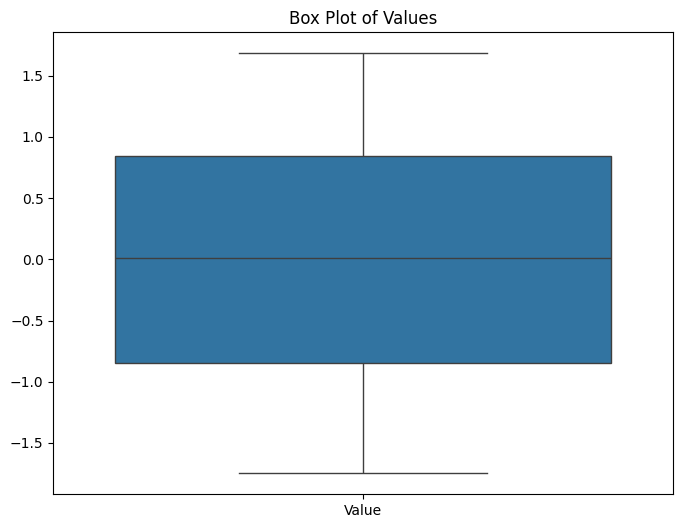

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Value']])
plt.title("Box Plot of Values")
plt.show()

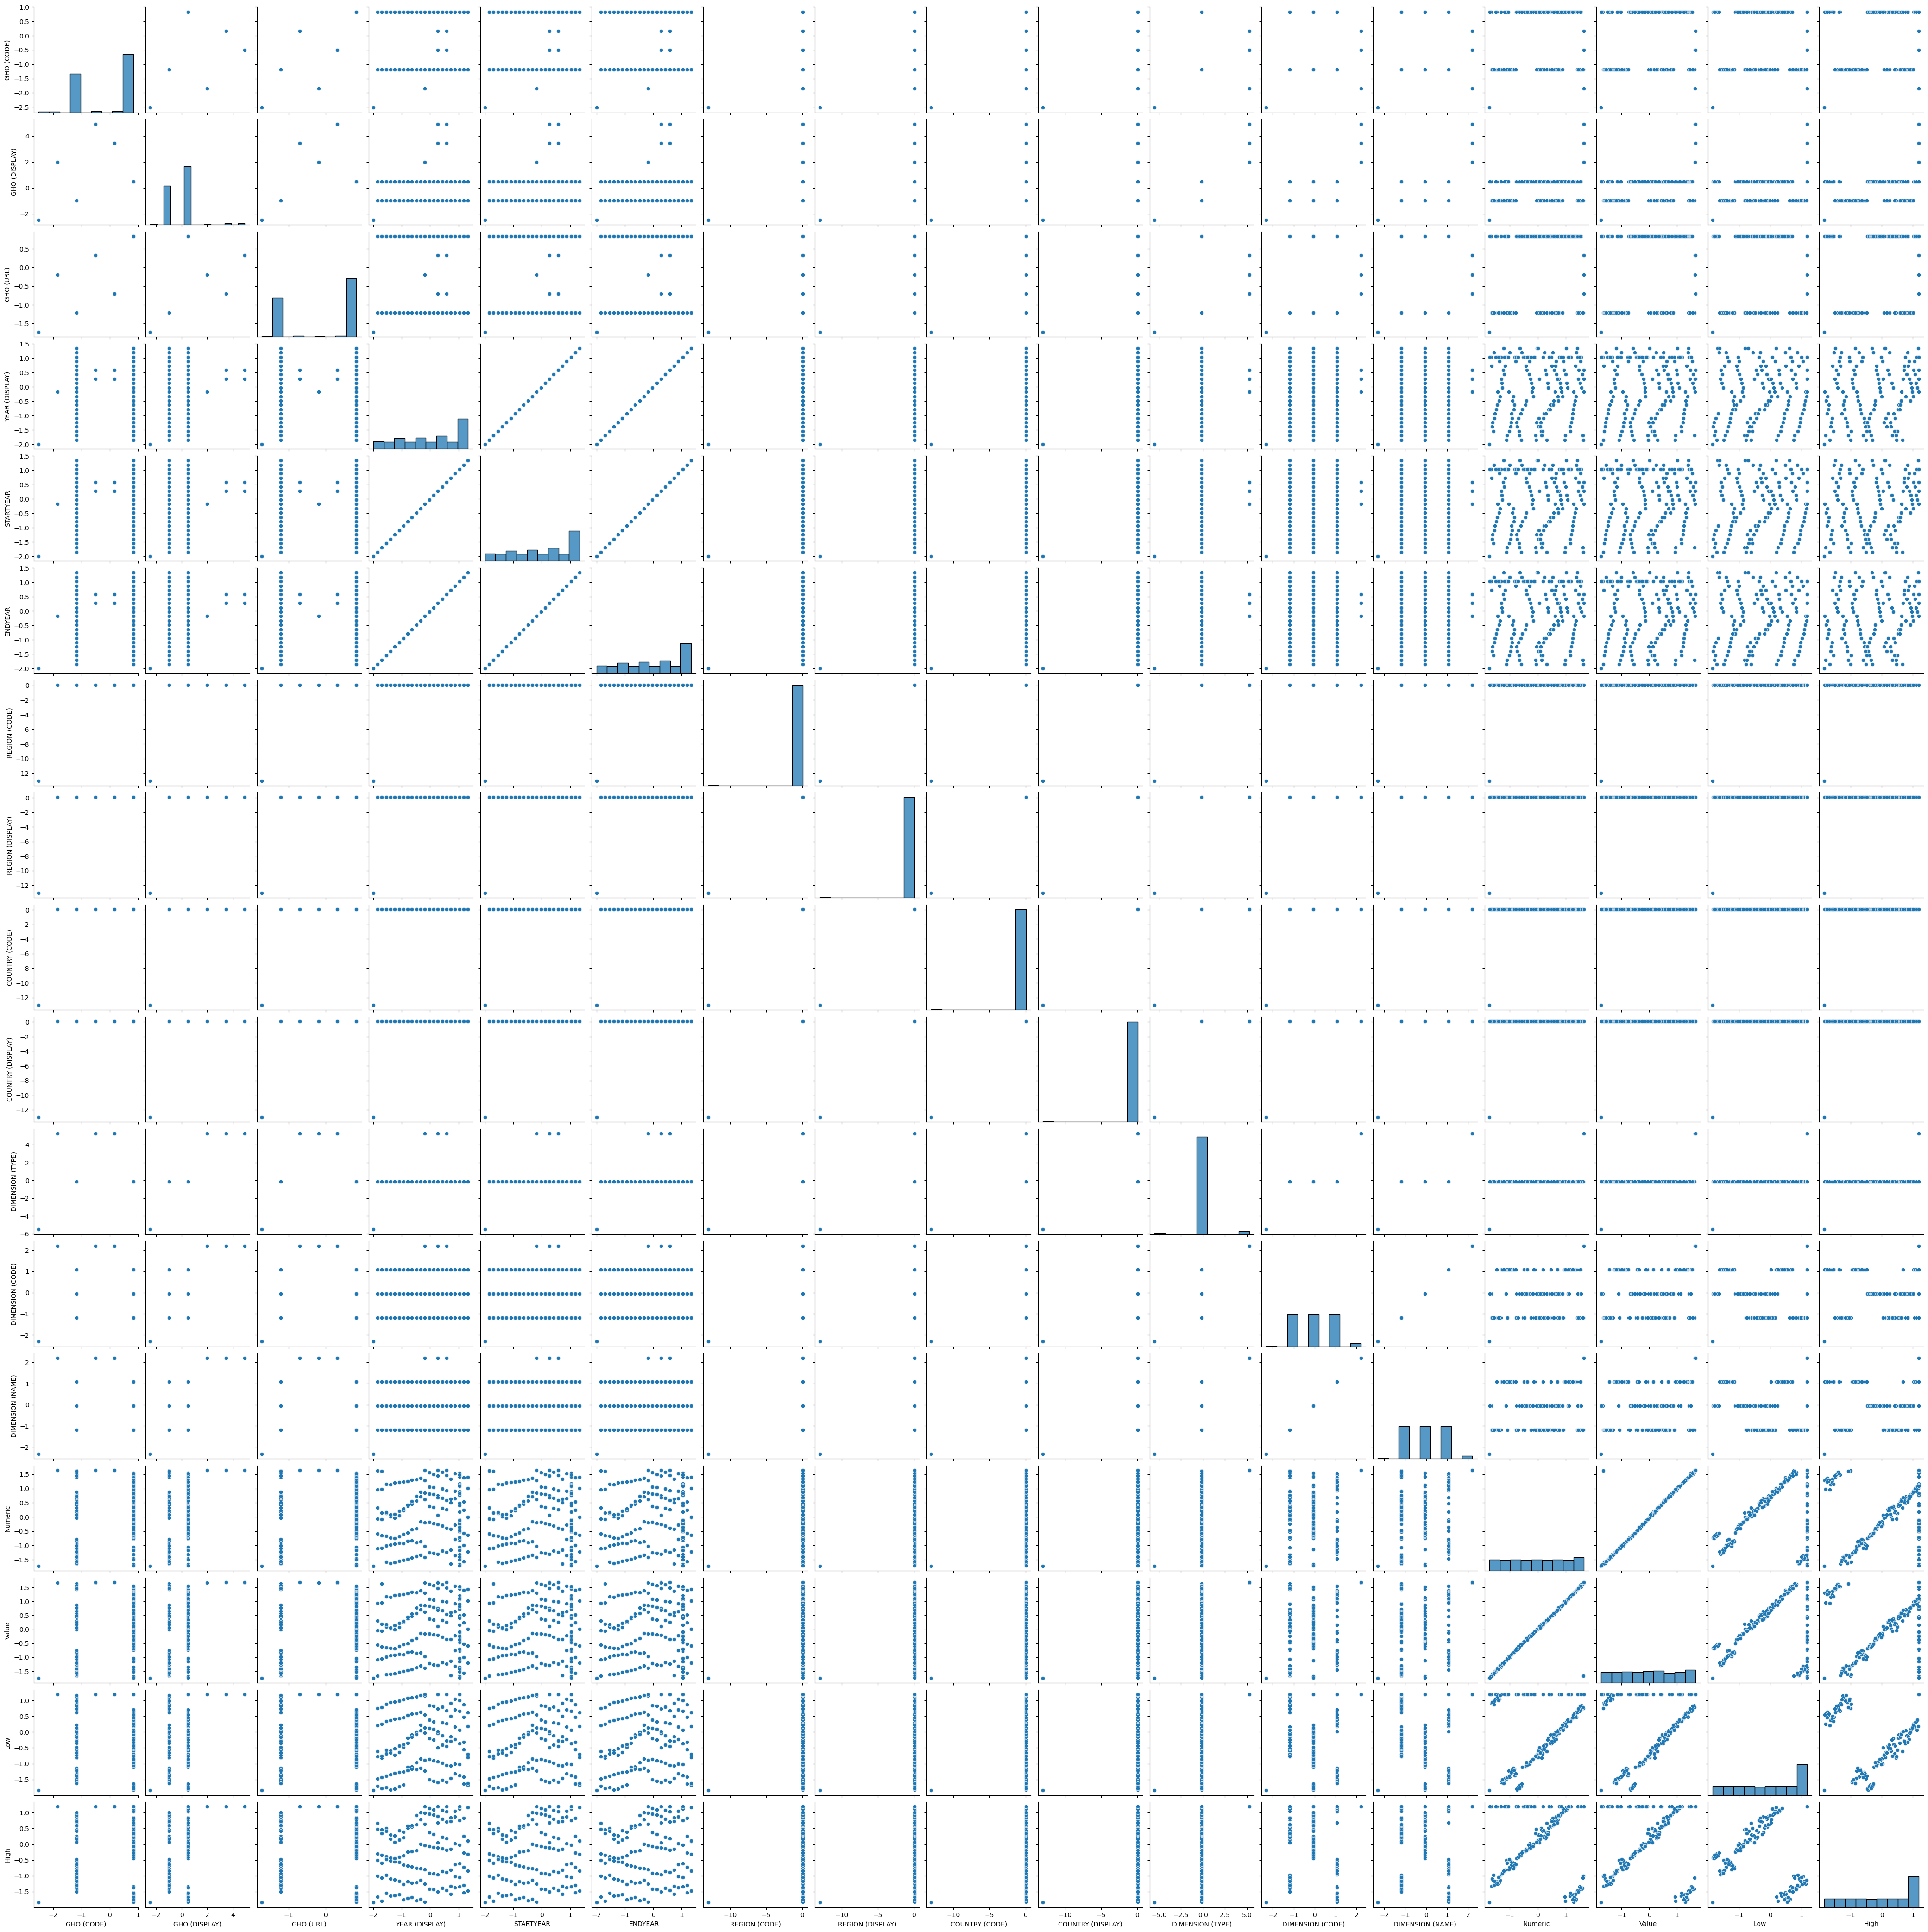

In [ ]:
# Pair Plot
sns.pairplot(df)
plt.show()

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

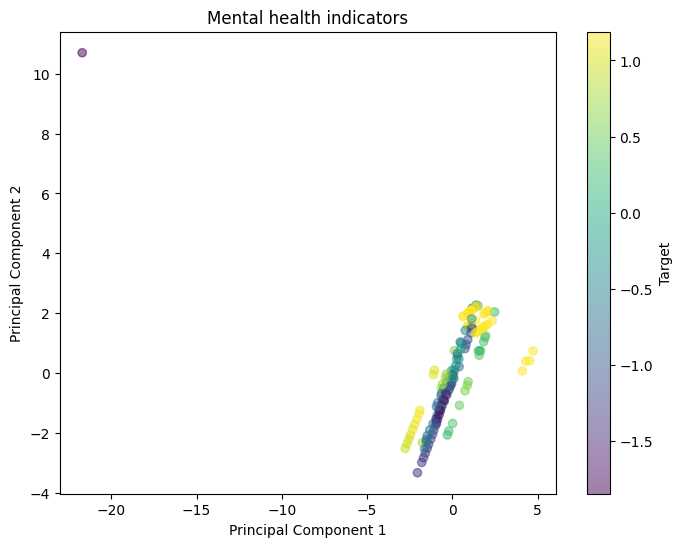

In [ ]:
# PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mental health indicators')
plt.show()

Text(0.5, 1.0, 't-SNE Mental health indicators')

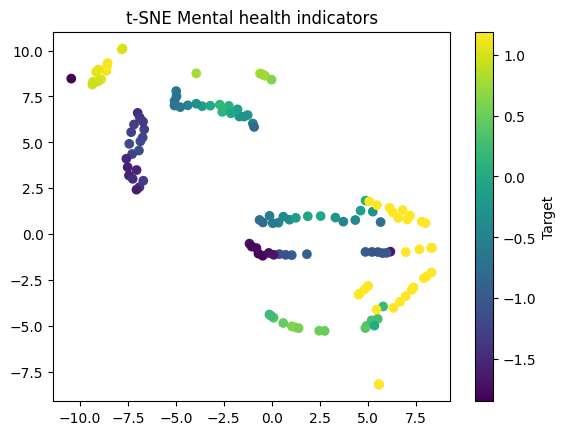

In [ ]:
# Apply t_SNE for Visualization
sample_size = 1000 # Reduce data for t-SNE to avoid computation overload
X_sample, y_sample = X_train[:sample_size], y_train[:sample_size]
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_sample)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_sample, cmap='viridis')
plt.colorbar(label='Target')
plt.title("t-SNE Mental health indicators")

In [ ]:
# Train Ensemble Models
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(X_train_pca, y_train)

boosting_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
boosting_model.fit(X_train_pca, y_train)

stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())],
    final_estimator=LinearRegression(),
)
stacking_model.fit(X_train_pca, y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Evaluation
def evaluate_model(model, name):
  y_pred = model.predict(X_test_pca)
  print(f"\n{name} Model Evaluation:")
  print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
  print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
  print("R^2 Score:", r2_score(y_test, y_pred))

evaluate_model(bagging_model, "Bagging")
evaluate_model(boosting_model, "Boosting")
evaluate_model(stacking_model, "Stacking")


Bagging Model Evaluation:
Mean Absolute Error: 0.4232772265097502
Mean Squared Error: 0.4023097699356671
R^2 Score: 0.5011881274134324

Boosting Model Evaluation:
Mean Absolute Error: 0.36297289645892583
Mean Squared Error: 0.4859155782435254
R^2 Score: 0.3975277817851739

Stacking Model Evaluation:
Mean Absolute Error: 0.46869300332138736
Mean Squared Error: 0.4030531082926017
R^2 Score: 0.5002664843774025


In [ ]:
# User Input for Prediction
print("\nEnter feature values for prediction:")

# Get all feature names except the target variable
feature_names = df.drop(columns=['Low']).columns

# Get input values for all features
user_input = []
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Preprocessing input and make predictions
user_input = np.array(user_input).reshape(1, -1)
user_input = scaler.transform(user_input)
user_input_pca = pca.transform(user_input)

bagging_pred = bagging_model.predict(user_input_pca)
boosting_pred = boosting_model.predict(user_input_pca)
stacking_pred = stacking_model.predict(user_input_pca)

print("\nPredicted Numeric using Bagging:", bagging_pred[0])
print("Predicted Numeric using Boosting:", boosting_pred[0])
print("predicted Numeric using Stacking:", stacking_pred[0])


Enter feature values for prediction:
GHO (CODE): 1
GHO (DISPLAY): 1
GHO (URL): 1
YEAR (DISPLAY): 1
STARTYEAR: 1
ENDYEAR: 1
REGION (CODE): 1
REGION (DISPLAY): 1
COUNTRY (CODE): 1
COUNTRY (DISPLAY): 1
DIMENSION (TYPE): 1
DIMENSION (CODE): 1
DIMENSION (NAME): 1
Numeric: 1
Value: 1
High: 1

Predicted Numeric using Bagging: 1.0900192654841327
Predicted Numeric using Boosting: 1.1885497896216375
predicted Numeric using Stacking: 0.8400712210501313


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Convert categorical feature to numeric
if 'REGION1' in df.columns and df['REGION1'].dtype == 'object': # Check if column exists and is of type object
    df['REGION'] = df['REGION1'].astype('category').cat.codes # Convert 'REGION1' and assign to a new column 'REGION'

In [ ]:
# Define features and target  variable
X = df[['Numeric', 'Value']].values
Y = df['High'].values

In [ ]:
X

array([[-1.72418506e+00, -1.74826927e+00],
       [-4.45379853e-01, -3.92564678e-01],
       [-8.91946752e-01, -8.58588130e-01],
       [ 1.83873505e-01,  1.58190311e-01],
       [ 9.34917836e-01,  9.84322794e-01],
       [-7.29558789e-01, -6.67942173e-01],
       [-1.60239409e+00, -1.57880619e+00],
       [ 1.22978019e-01,  9.46416580e-02],
       [-1.46030462e+00, -1.45170889e+00],
       [-1.61200917e-01, -1.38370068e-01],
       [ 1.38148474e+00,  1.40798048e+00],
       [ 2.44768992e-01,  2.42921847e-01],
       [ 1.43276514e-01,  2.00556079e-01],
       [-1.23702117e+00, -1.23988005e+00],
       [ 4.68052441e-01,  4.54750689e-01],
       [-8.10752771e-01, -7.73856594e-01],
       [ 1.19879828e+00,  1.21733452e+00],
       [ 4.17840374e-02,  7.34587738e-02],
       [ 1.13790279e+00,  1.15378587e+00],
       [ 7.11634386e-01,  7.08945299e-01],
       [ 7.52231377e-01,  7.51311068e-01],
       [ 1.63575010e-01,  1.79373195e-01],
       [-1.50090162e+00, -1.51525754e+00],
       [ 1.

In [ ]:
Y

array([-1.84491311, -0.2255457 , -0.7501295 ,  1.18854979,  1.02889385,
       -0.43081762, -1.11505737,  0.50431004,  1.18854979,  0.00253422,
       -1.52560122,  0.25342213,  0.45869406, -0.88697745,  1.18854979,
       -0.61328155, -1.61683319,  0.13938217, -1.63964118,  0.77800594,
        0.8920459 ,  0.41307807,  1.18854979, -1.57121721,  1.05170184,
       -0.79574549, -0.70451352,  1.18854979, -1.02382541, -1.00101741,
        1.18854979, -1.41156126,  0.18499815,  0.29903811, -0.24835369,
        1.18854979,  0.80081393,  0.84642991,  0.96046987, -0.4992416 ,
       -0.72732151,  0.27623012, -0.56766557, -1.73087315,  1.18854979,
       -1.5940252 ,  0.09376619,  1.1657418 ,  1.18854979,  1.18854979,
        0.11657418, -1.3203293 , -0.95540143,  1.18854979, -1.18348135,
        0.54992602,  1.18854979, -0.38520164,  1.18854979,  0.66396598,
       -0.08869775,  0.20780615, -0.04308176, -1.54840921, -0.13431373,
       -1.66244917, -1.20628934,  1.18854979,  1.09731782,  0.75

In [ ]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Define features and target variable
X = df[['Numeric', 'Value']].values
# Convert the target variable 'High' to categorical if it's not already
Y = pd.Categorical(df['High']).codes
#Y = df['High'].astype('category').cat.codes  # Another way to convert to categorical

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133,
       133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133,
       133, 133, 133, 133, 133, 133, 133, 133, 133], dtype=int16)

In [ ]:
# Evaluate model
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("classification Report:\n", report)

Accuracy: 0.2
classification Report:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          76       0.00      0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Function to predict class label for new data
def predict_class(feature1_value, feature2_value):
    # Convert categorical value to numeric if needed
    if isinstance(feature1_value, str):
        feature1_value = pd.Series([feature1_value]).astype('category').cat.codes[0]
    prediction = model.predict(np.array([[feature1_value, feature2_value]]))
    print(f"Predict class label: {prediction[0]}")
    return prediction[0]

In [ ]:
# Example prediction
predict_class('A', 9)  # change values as needed

Predict class label: 133


133

In [ ]:
# Assuming 'df' is your DataFrame and 'Value' is a column in it
x = df[['Value']].iloc[:, :-1]  # Select the 'Value' column and then apply iloc
y = df[['Value']].iloc[:, -1]   # Select the 'Value' column and then apply iloc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train SVM model
svm_model = SVC(kernel= 'linear', C=1.0, random_state=42)
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Model Evaluation
Y_pred = svm_model.predict(X_test)
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.2

Classification Report:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          76       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# User Input for Prediction
print("\nEnter feature values for prediction:")
user_input = []
# Get the feature names used during training
feature_names = ['Numeric', 'Value']

# Get input values for the required features
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Preprocess input and make prediction
user_input = np.array(user_input).reshape(1, -1)
prediction = svm_model.predict(user_input)

print("\nPredicted Class:", prediction[0])  # Access the predicted class label1


Enter feature values for prediction:
Numeric: 1
Value: 1

Predicted Class: 133


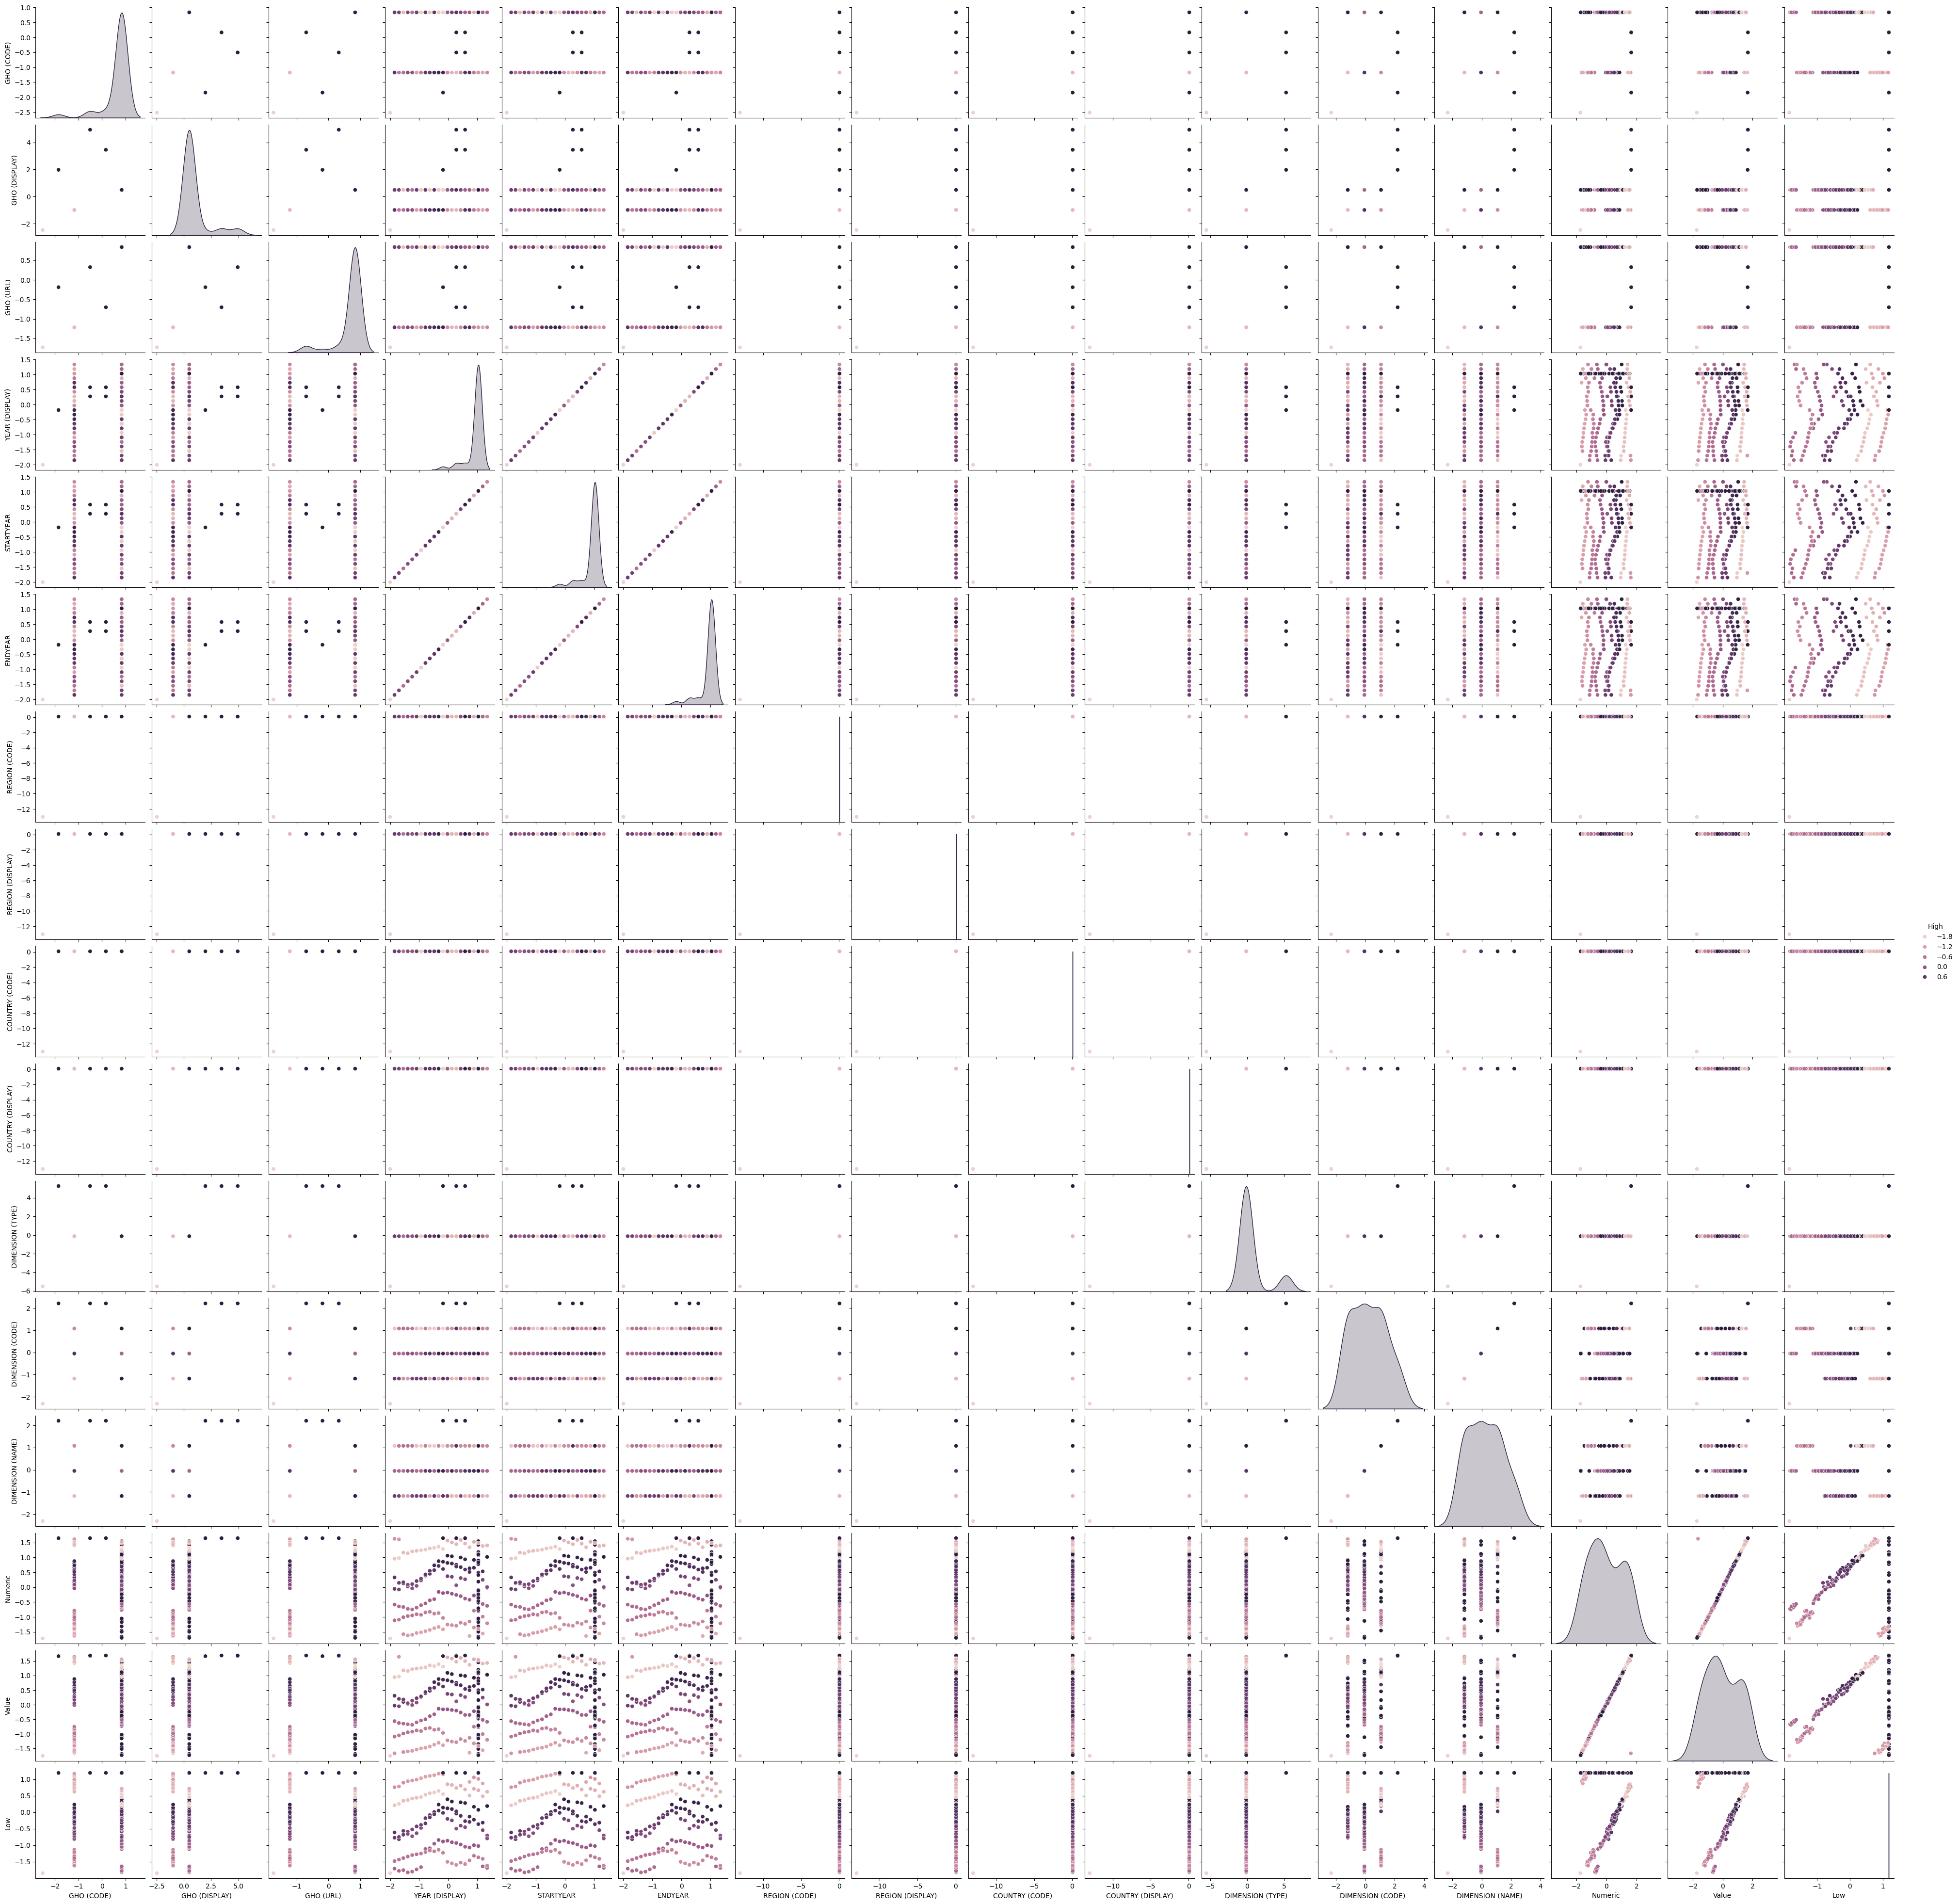

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df, hue='High', diag_kind='kde')
plt.show()

In [ ]:
# Train KNN model
k = 5 # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Model Evaluation
Y_pred = knn_model.predict(X_test)
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.17142857142857143

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          37       0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# User Input for Prediction
print("\nEnter feature values for prediction:")
user_input = []
# Get the feature names used during training
feature_names = ['Numeric', 'Value']

# Get input values for the required features
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Preprocess input and make prediction
user_input = np.array(user_input).reshape(1, -1)
prediction = svm_model.predict(user_input)


Enter feature values for prediction:
Numeric: 1
Value: 1


In [ ]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Model Evaluation
Y_pred = knn_model.predict(X_test)
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.17142857142857143

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          37       0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

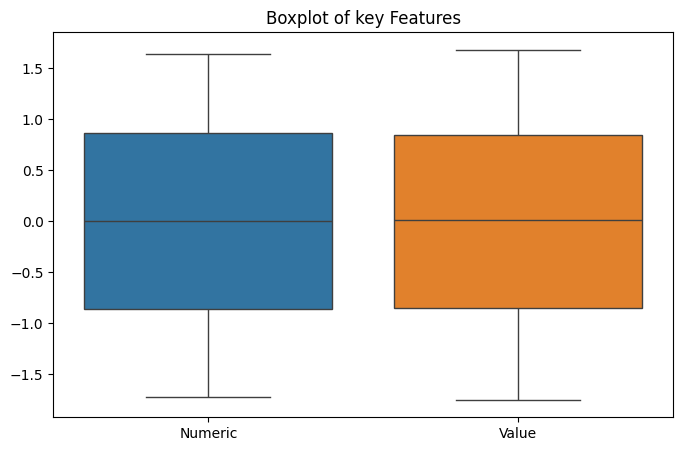

In [ ]:
# Box plot (using only two key features)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Numeric', 'Value']])
plt.title("Boxplot of key Features")
plt.show()

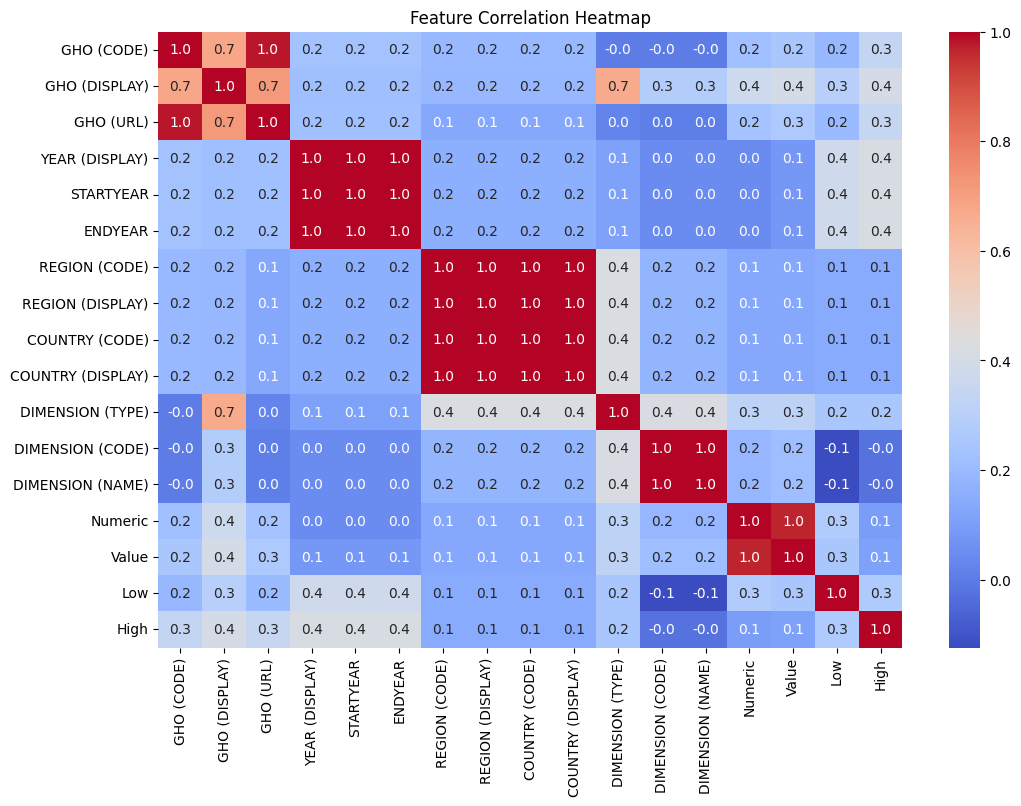

In [ ]:
# Heatmap of feature correlations
plt.figure(figsize=(12, 8))
# Calculate correlation for numeric columns only
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Feature Correlation Heatmap")
plt.show()

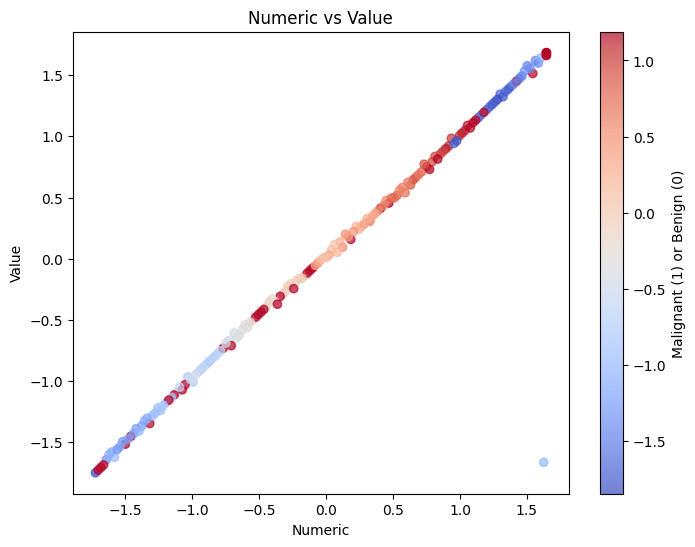

In [ ]:
# Visualization Using Matplotlib Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Numeric'], df['Value'], c=df['High'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Numeric')
plt.ylabel('Value')
plt.title('Numeric vs Value')
plt.colorbar(label='Malignant (1) or Benign (0)')
plt.show()

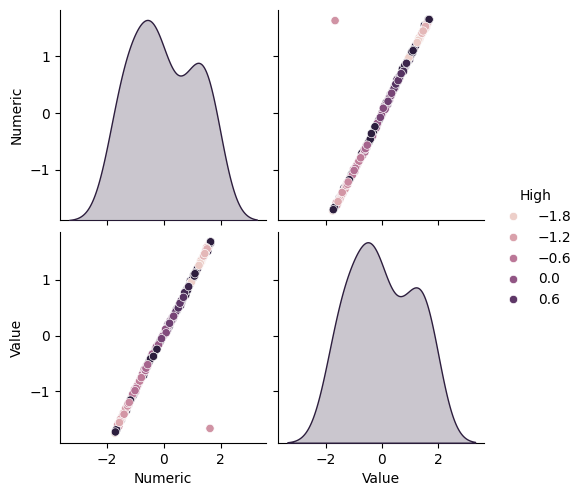

In [ ]:
# Pair plot
sns.pairplot(df[['Numeric', 'Value', 'High']], hue='High')  # Include 'High' column in the DataFrame
plt.show()

In [ ]:
# Model Evaluation
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [ ]:
# AIC and BIC Calculation (using statsmodels) ARE essential tools in multiple linear regression for selecting the best model
from sklearn.preprocessing import StandardScaler # Importing StandardScaler if not already imported

# Scale X_train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform X_train

# Now you can use X_train_scaled
X_train_const = sm.add_constant(X_train_scaled) #Add intercept
ols_model = sm.OLS(Y_train, X_train_const).fit()
aic = ols_model.aic
bic = ols_model.bic

In [ ]:
# Print perfromance metrics
print("\nModel Evaluation Metrics:")
print(f"R-Squared (R²): {r2:4f}")
print (f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Akaike Information Criterion (AIC): {aic:.4f}")
print(f"Bayesian Information Criterion (BIC): {bic:.4f}")


Model Evaluation Metrics:
R-Squared (R²): -0.508800
Mean Absolute Error (MAE): 35.9429
Mean Squared Error (MSE): 3245.7714
Root Mean Squared Error (RMSE): 56.9717
Akaike Information Criterion (AIC): 1403.4170
Bayesian Information Criterion (BIC): 1412.1550


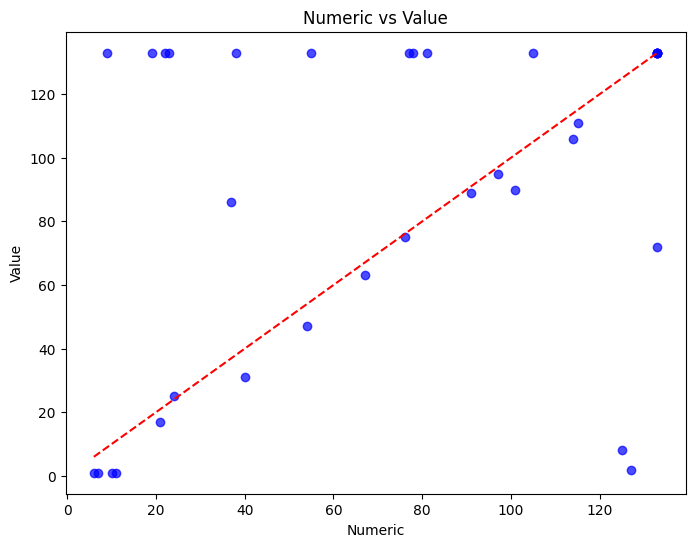

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color="blue")
plt.xlabel("Numeric")
plt.ylabel("Value")
plt.title("Numeric vs Value")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color="red", linestyle="--") # Liney=x
plt.show()